### Import Modules and Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df_ger = pd.read_csv("data/preprocessed_survey_results_encoded.csv")

#### Helper Functions


In [3]:
def calc_scores(estimators, x_test, y_test) -> (list, list, list, list, list):
    """
    Calculates the scores from multiple estimators. For example of cross validations.

    :param estimators: list of estimators
    :param x_test: x test split
    :param y_test: y test split
    :return: quadruple of list of the scores
    """
    r2_scores = []
    mae_scores =  []
    mape_scores = []
    rmse_scores = []
    max_scores = []
    for estimator in estimators:
        predictions = estimator.predict(x_test)
        r2_scores.append(metrics.r2_score(y_test, predictions))
        mae_scores.append(metrics.mean_absolute_error(y_test, predictions))
        mape_scores.append(metrics.mean_absolute_percentage_error(y_test, predictions))
        rmse_scores.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
        max_scores.append(metrics.max_error(y_test, predictions))

    return r2_scores, mae_scores, mape_scores, rmse_scores, max_scores

## Multi-Layer-Perceptron

#### Divide Dataset into Train and Test Data

In [4]:
selected_features = ['YearsCode', 'OrgSize', 'Age','Bachelor’s degree', 'Doctoral degree', 'Master’s degree','Primary school', 'Professional degree', 'Secondary school','University courses', 'in-person', 'remote']
# selected_features = ['YearsCode', 'OrgSize', 'Age','Bachelor’s degree', 'Doctoral degree', 'Master’s degree','Primary school', 'Professional degree', 'Secondary school','University courses', 'in-person', 'remote', 'APL', 'Assembly','Bash/Shell', 'C', 'C#', 'C++', 'COBOL', 'Clojure', 'Crystal', 'Dart','Delphi', 'Elixir', 'Erlang', 'F#', 'Fortran', 'Go', 'Groovy','HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'LISP','Lua', 'MATLAB', 'OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell','Python', 'R', 'Ruby', 'Rust', 'SAS', 'SQL', 'Scala', 'Solidity','Swift', 'TypeScript', 'VBA']

x = df_ger[selected_features]
y = df_ger['Salary']

scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)
folds = KFold(n_splits=10, shuffle=True, random_state=100)

We get a significantly faster runtime and also a better results with mlp with fewer parameters. Therefore, the programming languages are left out. A PCA could be done to include some of them.

#### RELU activation function

Samples: [72111.84677349 60907.26396887 89380.99939224 52242.91712608
 59273.53552332]
R2:      0.167
MAE:     14153
MAPE:    0.2
RMSE:    18517
MAX:     74456


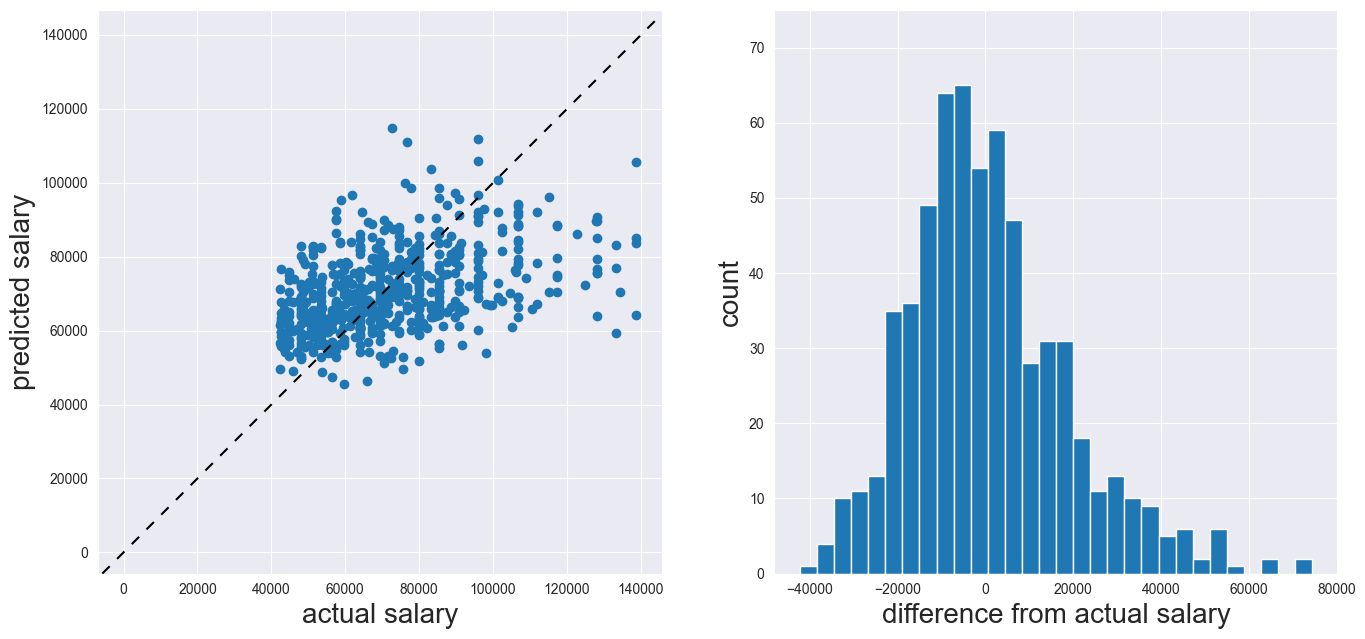

In [5]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(64, 32, 16, 4), activation='relu', alpha=0.005, learning_rate='adaptive', learning_rate_init=0.1, max_iter=2000)

mlp_regressor.fit(x_train, y_train)
prediction_mlp = mlp_regressor.predict(x_test)

r2_scores, mae_scores, mape_scores, rmse_scores, max_scores = calc_scores([mlp_regressor], x_test, y_test)
print("Samples:", prediction_mlp[:5])
print("R2:     ", np.round(np.mean(r2_scores), 3))
print("MAE:    ", np.mean(mae_scores).astype(int))
print("MAPE:   ", np.round(np.mean(mape_scores), 3))
print("RMSE:   ", np.mean(rmse_scores).astype(int))
print("MAX:    ", np.max(max_scores).astype(int))

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].scatter(x=y_test, y=prediction_mlp)
axs[0].axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)))
axs[0].axis('square')
axs[0].set(xlabel="actual salary", ylabel="predicted salary")
axs[1].set(xlabel="difference from actual salary", ylabel="count")
axs[1].hist((y_test-prediction_mlp), bins=30)
axs[1].set_ylim(ymax=75)

axs[0].set_aspect(np.diff(axs[0].get_xlim())[0] / np.diff(axs[0].get_ylim())[0])
axs[1].set_aspect(np.diff(axs[1].get_xlim())[0] / np.diff(axs[1].get_ylim())[0])

axs[0].xaxis.label.set_size(20)
axs[0].yaxis.label.set_size(20)
axs[1].xaxis.label.set_size(20)
axs[1].yaxis.label.set_size(20)

plt.show()

We get a good result with the relu activation function, but it is not significantly better than the linear regression.

#### Logistic activation function (3 layers)

Samples: [72667.17351905 72667.17351905 72667.17351905 72667.17351905
 72667.17351905]
R2:      -0.002
MAE:     16090
MAPE:    0.238
RMSE:    20317
MAX:     65969


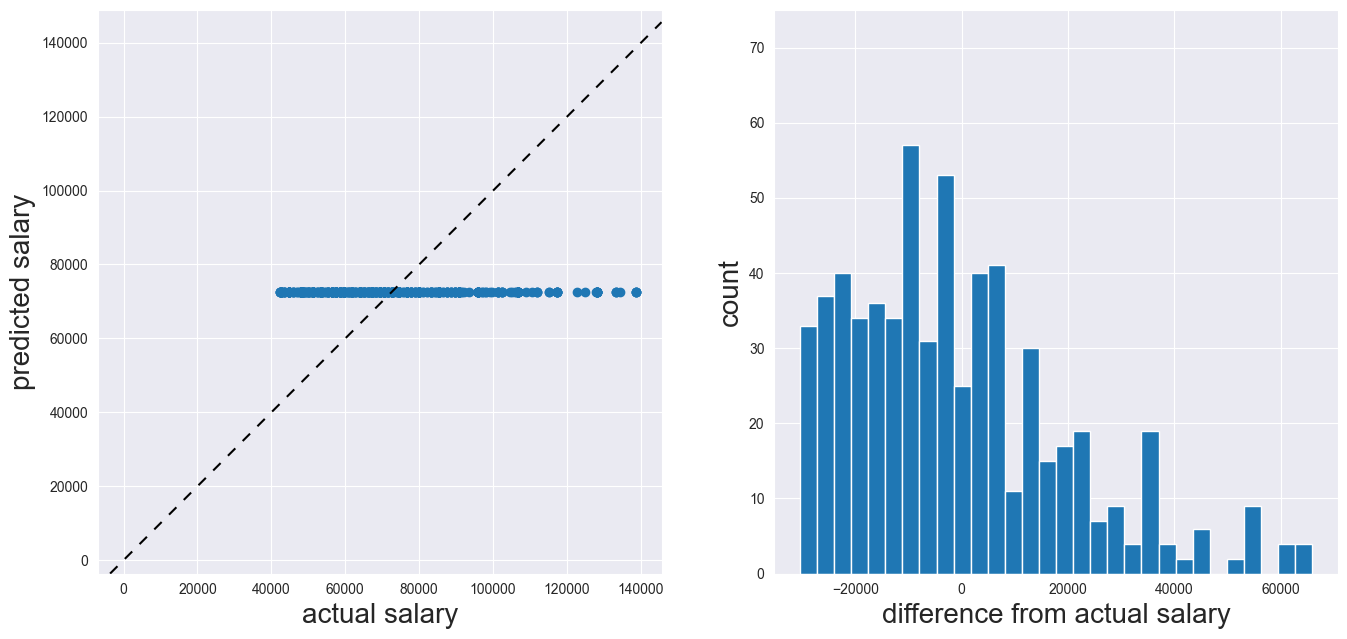

In [6]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(64, 32, 16, 4), activation='logistic', learning_rate_init=1, max_iter=5000, solver='adam')

mlp_regressor.fit(x_train, y_train)
prediction_mlp = mlp_regressor.predict(x_test)

r2_scores, mae_scores, mape_scores, rmse_scores, max_scores = calc_scores([mlp_regressor], x_test, y_test)
print("Samples:", prediction_mlp[:5])
print("R2:     ", np.round(np.mean(r2_scores), 3))
print("MAE:    ", np.mean(mae_scores).astype(int))
print("MAPE:   ", np.round(np.mean(mape_scores), 3))
print("RMSE:   ", np.mean(rmse_scores).astype(int))
print("MAX:    ", np.max(max_scores).astype(int))

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].scatter(x=y_test, y=prediction_mlp)
axs[0].axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)))
axs[0].axis('square')
axs[0].set(xlabel="actual salary", ylabel="predicted salary")
axs[1].set(xlabel="difference from actual salary", ylabel="count")
axs[1].hist((y_test-prediction_mlp), bins=30)
axs[1].set_ylim(ymax=75)

axs[0].set_aspect(np.diff(axs[0].get_xlim())[0] / np.diff(axs[0].get_ylim())[0])
axs[1].set_aspect(np.diff(axs[1].get_xlim())[0] / np.diff(axs[1].get_ylim())[0])

axs[0].xaxis.label.set_size(20)
axs[0].yaxis.label.set_size(20)
axs[1].xaxis.label.set_size(20)
axs[1].yaxis.label.set_size(20)

plt.show()

Somehow, with the logistic and tanh function, the MLP with multiple layer learns only learns one value.

#### Logistic activation function (1 layer)

Samples: [80854.64310307 61650.68070578 88064.70229429 55317.64032813
 57348.11033539]
R2:      0.164
MAE:     14422
MAPE:    0.21
RMSE:    18553
MAX:     67003


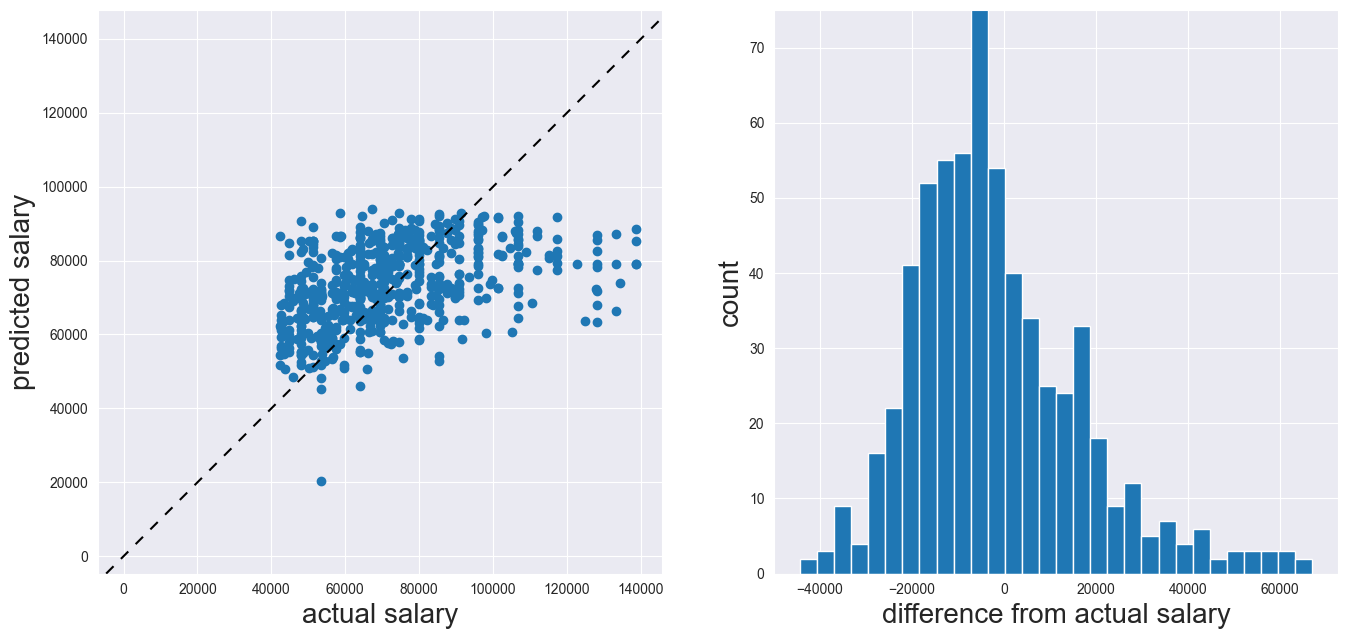

In [7]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(200,), activation='logistic', alpha=0.05, learning_rate='adaptive', learning_rate_init=0.1, max_iter=5000, momentum=0.01, solver='adam')

mlp_regressor.fit(x_train, y_train)
prediction_mlp = mlp_regressor.predict(x_test)

r2_scores, mae_scores, mape_scores, rmse_scores, max_scores = calc_scores([mlp_regressor], x_test, y_test)
print("Samples:", prediction_mlp[:5])
print("R2:     ", np.round(np.mean(r2_scores), 3))
print("MAE:    ", np.mean(mae_scores).astype(int))
print("MAPE:   ", np.round(np.mean(mape_scores), 3))
print("RMSE:   ", np.mean(rmse_scores).astype(int))
print("MAX:    ", np.max(max_scores).astype(int))

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].scatter(x=y_test, y=prediction_mlp)
axs[0].axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)))
axs[0].axis('square')
axs[0].set(xlabel="actual salary", ylabel="predicted salary")
axs[1].set(xlabel="difference from actual salary", ylabel="count")
axs[1].hist((y_test-prediction_mlp), bins=30)
axs[1].set_ylim(ymax=75)

axs[0].set_aspect(np.diff(axs[0].get_xlim())[0] / np.diff(axs[0].get_ylim())[0])
axs[1].set_aspect(np.diff(axs[1].get_xlim())[0] / np.diff(axs[1].get_ylim())[0])

axs[0].xaxis.label.set_size(20)
axs[0].yaxis.label.set_size(20)
axs[1].xaxis.label.set_size(20)
axs[1].yaxis.label.set_size(20)
plt.show()

With one layer level we get a better result, but even there the values seem to be caped at a max and min prediction.